In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import statistics
import datetime

In [2]:
city_data_path = os.path.join('Resources','city_data.csv')
ride_data_path = os.path.join('Resources','ride_data.csv')

In [3]:
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

In [4]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [5]:
ride_data_df.tail()

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df.tail()

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


In [8]:
ride_data_df.notnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
city_data_df.notnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
city_data_df[city_data_df['type'] == 'Urban'].count()

city            66
driver_count    66
type            66
dtype: int64

In [12]:
city_data_df[city_data_df['type'] == 'Suburban'].count()

city            36
driver_count    36
type            36
dtype: int64

In [13]:
city_data_df[city_data_df['type'] == 'Rural'].count()

city            18
driver_count    18
type            18
dtype: int64

In [14]:
ride_data_df.notnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
len(ride_data_df['city'].unique())

120

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
city_ride_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
city_ride_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [18]:
# Create the Urban city DataFrame
urban_cities_df=city_ride_df[city_ride_df['type'] == 'Urban']
suburban_cities_df=city_ride_df[city_ride_df['type'] == 'Suburban']
rural_cities_df=city_ride_df[city_ride_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
urban_ride_count = urban_cities_df.groupby(urban_cities_df['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(suburban_cities_df['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(rural_cities_df['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [22]:
urban_avg_fare = urban_cities_df.groupby(urban_cities_df['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
rural_avg_fare = rural_cities_df.groupby(rural_cities_df['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [24]:
suburban_avg_fare = suburban_cities_df.groupby(suburban_cities_df['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [25]:
urban_driver_count = urban_cities_df.groupby(urban_cities_df['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
suburban_driver_count = suburban_cities_df.groupby(suburban_cities_df['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [27]:
rural_driver_count = rural_cities_df.groupby(rural_cities_df['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [28]:
urban_avg_fare.min()

20.093157894736848

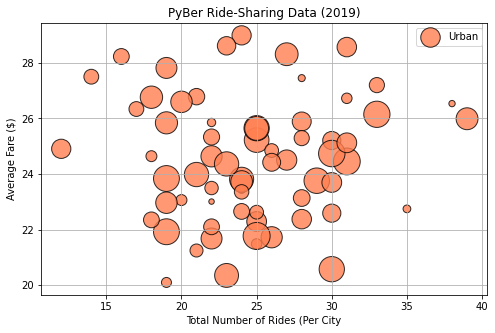

In [29]:
# plt.scatter(urban_ride_count, urban_avg_fare, s=[i*2 for i in urban_driver_count],color)
plt.figure(figsize=(8,5))
plt.scatter(urban_ride_count,
        urban_avg_fare, 
        s=10*urban_driver_count,
        c='coral', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Urban')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
# plt.yticks(np.arange(20,31,step=2))
plt.show()

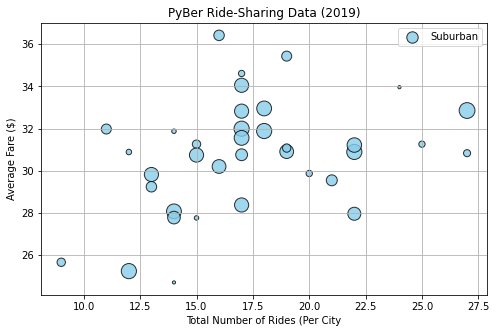

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(suburban_ride_count,
        suburban_avg_fare, 
        s=10*suburban_driver_count,
        c='skyblue', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Suburban')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
plt.show()

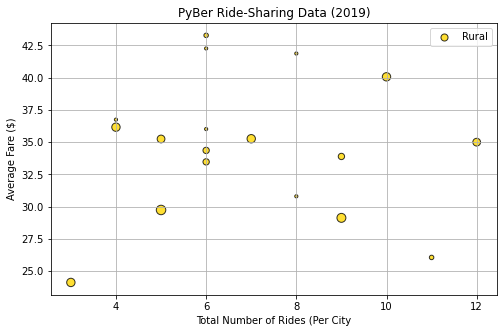

In [31]:
plt.figure(figsize=(8,5))
plt.scatter(rural_ride_count,
        rural_avg_fare, 
        s=10*rural_driver_count,
        c='gold', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Rural')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
plt.show()

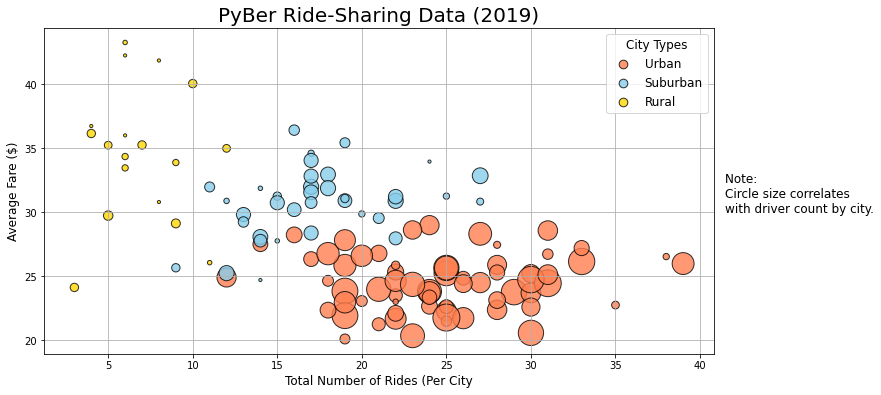

In [110]:
plt.figure(figsize=(12,6))
plt.scatter(urban_ride_count,
        urban_avg_fare, 
        s=10*urban_driver_count,
        c='coral', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Urban')

plt.scatter(suburban_ride_count,
        suburban_avg_fare, 
        s=10*suburban_driver_count,
        c='skyblue', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Suburban')

plt.scatter(rural_ride_count,
        rural_avg_fare, 
        s=10*rural_driver_count,
        c='gold', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Rural')

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(41.5,30,'Note: \nCircle size correlates \nwith driver count by city.', fontsize=12)
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
# plt.show()
plt.savefig('analysis\Fig1.png',bbox_inches='tight')
plt.show()

In [33]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [34]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [41]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [42]:
import scipy.stats as sts

In [43]:
print(f"The mean for urban ride counts is {np.mean(urban_ride_count)}")
print(f"The median for urban ride counts is {np.median(urban_ride_count)}")
print(f'The mode for urban ride counts is {sts.mode(urban_ride_count)}')

The mean for urban ride counts is 24.62121212121212
The median for urban ride counts is 24.0
The mode for urban ride counts is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [44]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [46]:
rural_ride_count.mode()

0    6
dtype: int64

In [47]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [53]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [54]:
urban_cities_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [55]:
urban_fares = urban_cities_df['fare']

In [56]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [63]:
sts.mode(urban_cities_df['fare'])

ModeResult(mode=array([22.86]), count=array([5]))

In [60]:
print(f"The mean for urban fares is {np.mean(urban_fares)}")
print(f"The median for urban fares is {np.median(urban_fares)}")
print(f'The mode for urban fares is {sts.mode(urban_fares)}')

The mean for urban fares is 24.52577230769236
The median for urban fares is 24.64
The mode for urban fares is ModeResult(mode=array([22.86]), count=array([5]))


In [70]:
print(f"The mean for suburban fares is {np.mean(suburban_cities_df['fare'])}")
print(f"The median for suburban fares is {np.median(suburban_cities_df['fare'])}")
print(f"The mode for suburban fares is {sts.mode(suburban_cities_df['fare'])}")

The mean for suburban fares is 30.97012800000002
The median for suburban fares is 30.75
The mode for suburban fares is ModeResult(mode=array([17.99]), count=array([3]))


In [71]:
print(f"The mean for rural fares is {np.mean(rural_cities_df['fare'])}")
print(f"The median for rural fares is {np.median(rural_cities_df['fare'])}")
print(f"The mode for rural fares is {sts.mode(rural_cities_df['fare'])}")

The mean for rural fares is 34.623440000000016
The median for rural fares is 37.05
The mode for rural fares is ModeResult(mode=array([37.05]), count=array([2]))


In [72]:
print(f"The mean for urban driver count is {np.mean(urban_cities_df['driver_count'])}")
print(f"The median for urban driver count is {np.median(urban_cities_df['driver_count'])}")
print(f"The mode for urban driver count is {sts.mode(urban_cities_df['driver_count'])}")

The mean for urban driver count is 36.67815384615385
The median for urban driver count is 37.0
The mode for urban driver count is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [73]:
print(f"The mean for suburban driver count is {np.mean(suburban_cities_df['driver_count'])}")
print(f"The median for suburban driver count is {np.median(suburban_cities_df['driver_count'])}")
print(f"The mode for suburban driver count is {sts.mode(suburban_cities_df['driver_count'])}")

The mean for suburban driver count is 13.712
The median for suburban driver count is 16.0
The mode for suburban driver count is ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [74]:
print(f"The mean for rural driver count is {np.mean(rural_cities_df['driver_count'])}")
print(f"The median for rural driver count is {np.median(rural_cities_df['driver_count'])}")
print(f"The mode for rural driver count is {sts.mode(rural_cities_df['driver_count'])}")

The mean for rural driver count is 4.296
The median for rural driver count is 4.0
The mode for rural driver count is ModeResult(mode=array([1], dtype=int64), count=array([32]))


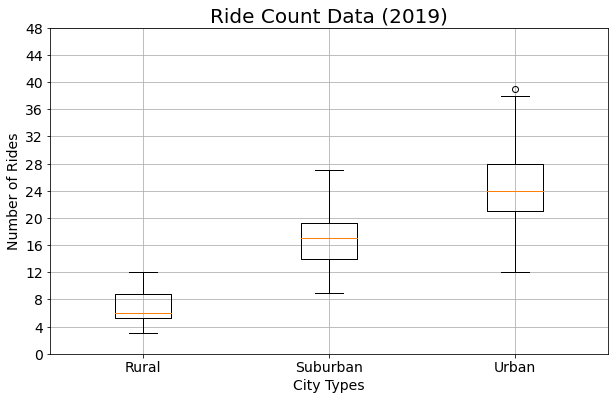

In [201]:
x_labels = ['Urban', 'Suburban','Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0,51,step=4))
ax.grid()
plt.gca().invert_xaxis()
plt.savefig("analysis/fig2.png")
plt.show()

In [93]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest ride count')

West Angela has the highest ride count


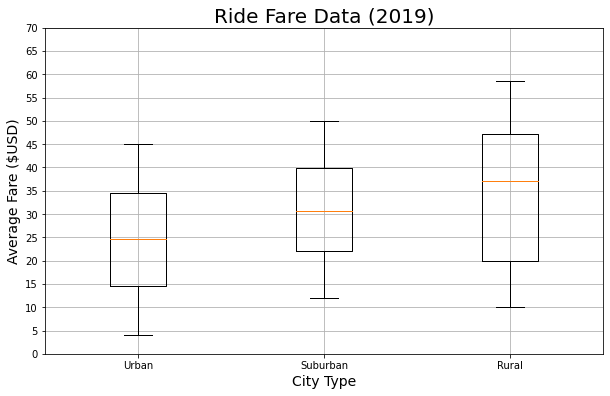

In [114]:
fig, ax=plt.subplots(figsize=(10,6))
city_fare_data = [urban_cities_df['fare'], suburban_cities_df['fare'],rural_cities_df['fare']]
ax.boxplot(city_fare_data,labels=x_labels)
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Average Fare ($USD)',fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
ax.set_yticks(np.arange(0,75,5))
plt.grid()
plt.savefig('analysis/fig3.png',bbox_inches='tight')
plt.show()

findfont: Font family ['minion pro'] not found. Falling back to DejaVu Sans.


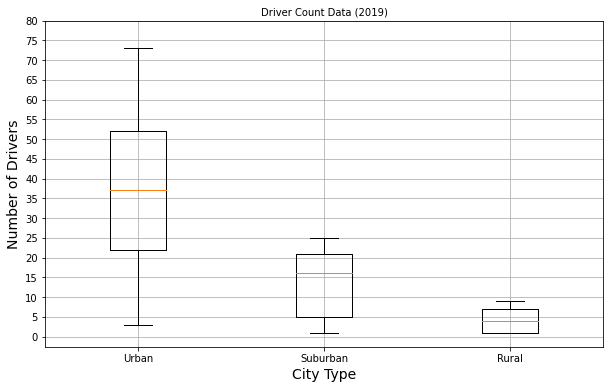

In [125]:
driver_count_data = [urban_cities_df['driver_count'],suburban_cities_df['driver_count'],rural_cities_df['driver_count']]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,81,step=5))
ax.set_title('Driver Count Data (2019)',fontsize=20,font='minion pro')
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel('City Type',fontsize=14)
plt.grid()
plt.savefig('analysis/fig4',bbox_inches='tight')
plt.show()

In [126]:
city_ride_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [127]:
total_fare_df = city_ride_df.groupby('type').sum()['fare']
total_fare_df

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

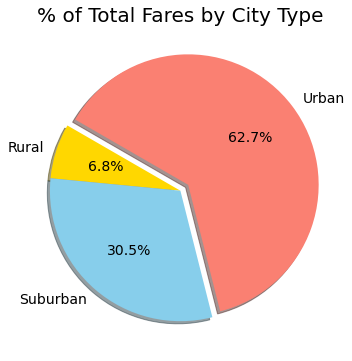

In [212]:
import matplotlib as mpl
fig, ax=plt.subplots(figsize=(10,6))
ax.pie(total_fare_df, 
        labels = total_fare_df.index, 
        startangle=150,
        shadow=2,
        explode=[0,0,0.075],
        autopct="%.1f%%",
        colors=['gold','skyblue','salmon'])
ax.set_title("% of Total Fares by City Type",fontsize=20)
ax.set_bgcolor = 'green'
# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig5.png', facecolor='white')
plt.show()

In [191]:
total_rides_df = city_ride_df.groupby('type').count()['ride_id']
total_rides_df

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

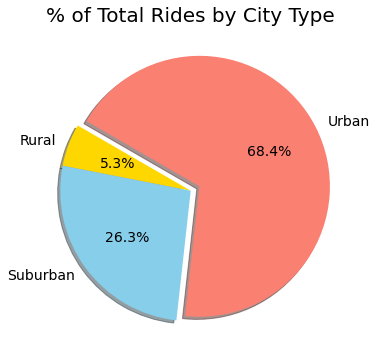

In [214]:
# import matplotlib as mpl
fig, ax=plt.subplots(figsize=(10,6))
ax.pie(total_rides_df, 
        labels = total_rides_df.index, 
        startangle=150,
        shadow=2,
        explode=[0,0,0.075],
        autopct="%.1f%%",
        colors=['gold','skyblue','salmon'])
ax.set_title("% of Total Rides by City Type",fontsize=20)
# Change the default font size from 10 to 14
# mpl.rcParams['font.size'] = 14
plt.savefig('analysis/fig6.png',facecolor='white')
plt.show()

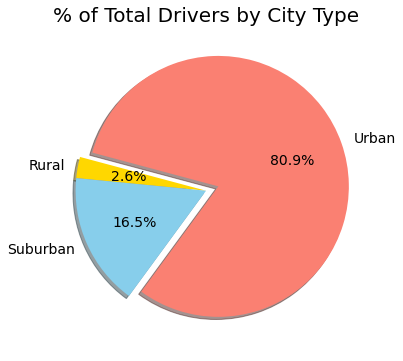

In [196]:
total_drivers_df = city_data_df.groupby('type').sum()['driver_count']
fig, ax=plt.subplots(figsize=(10,6))
ax.pie(total_drivers_df, 
        labels = total_drivers_df.index, 
        startangle=165,
        shadow=2,
        explode=[0,0,0.1],
        autopct="%.1f%%",
        colors=['gold','skyblue','salmon'])
ax.set_title("% of Total Drivers by City Type",fontsize=20)
plt.savefig('analysis/fig7.png')
plt.show()